In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from pca import pca
from datetime import datetime,date
import scipy.stats as stats
from sklearn.cluster import OPTICS, cluster_optics_dbscan

pd.set_option('display.max_columns',None)

# 2.1 Task 1 – Story

A retail chain has it's outlets in Germany and the head outlet manager in Kiel is competing with other region's outlets for the upcoming campaign. The manager is looking ways to reduce the cost and maximize profits for her outlets. She has been collecting some data about the customers through physical and online surveys. So, she hired me as a data scientist to do a project that would generate useful insights from the data. 

This project intends to analyze customer's spending habits using their personal data and shopping data. In this project, I would create clusters of customers with similar spending habits and background. I would experiment with two of the most used clustering algorithms. I would also implement them with the dataset's original features  and reduced features. After running all possible clusterings, I would select the most relevant clustering model to create clusters. Then, with various charts I would generate insights which the manager would use to increase the store's efficiency.

This project aims to create clusters of customers which are to be used to channelize advertisements for the next marketing campaign. Using clusters, the manager would be able to understand what groups of customers are buying what products. It would help to analyze what kind of customers are spending the most/least. It would help to analyze different groups of customers' preferences of products and shopping approaches (online, deals, in-store). 

Based on these analyses, the manager could decide on the products to have deals/discounts, maximizing profits. She could figure out different advertising strategies for different groups of customers (posters, online) which would help to assign appropriate resources for different advertisment types.

# 2.2 Task 2 – The Data

### Data Reference: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

In [287]:
raw_df = pd.read_csv('marketing_campaign.csv',sep='\t')
# saving raw dataset separately
df = raw_df.copy(deep=True)
raw_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [288]:
raw_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Columns/Features Description

- ID: Customer's Id
- Year_Birth: Customer's birth year
- Education: Customer's level of education
- Martial_Status: Customer's marital status at the time of data creation
- Income: Customer's yearly household income
- Kidhome: Number of small children at customer's household
- Tennhome: Number of teenagers in customer’s household
- Dt_Customer: Date of customer’s enrolment with the company/store
- Recency: Number of days since the last purchase
- MntWines: Amount spent on wine products in the last 2 years
- MntFruits: Amount spent on fruit products in the last 2 years
- MntMeatProducts: Amount spent on meat products in the last 2 years
- MntFishProducts: Amount spent on fish products in the last 2 years
- MntSweetProducts: Amount spent on sweet products in the last 2 years
- MntGoldProducts: Amount spent on gold products in the last 2 years
- NumDealsPurchases: Number of purchases made with discount
- NumWebPurchases: Number of purchases made through company’s web site
- NumCatalogPurchases: Number of purchases made using catalogue
- NumStorePurchases:  Number of purchases made directly in stores
- NumWebVisitsMonth: Number of website visits in a month by a customer
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Z_CostContact: Cost to contact a customer
- Z_Revenue: Revenue after client accepting campaign
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (target variable for classification)


- The dataset has features such as **Education**, **Year_Birth**, **Income**, **Recency**, **Mntwines**, **Mntfruits**, **NumDealsPurchases**, **NumCatgalogPurchases**, **NumWebVisitsmonth** which are quite relevant when we want to group similar customers and recognize their spending patterns as a group/cluster 

# 2.3 Task 3 – IDA
Conduct an initial data analysis.
- Present some distributions and statistical properties that inform the reader about the dataset or
that are relevant for your project

In [289]:
df.shape

(2240, 29)

- The dataset has 2240 no of rows and 29 columns 
- Some of the columns in the dataset are not the actual features, meaning they don't really provide any useful insights

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- We have 3 columns with object datatype and other remaining columns are of datatype integer
- Columns like Year_Birth and Dt_Customer are of integer type but they represent dates/years

In [291]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


- Median **Year_Birth** of customers is 1970
- The mean **Income** of customers is over \$52247
- A customer has 0.44 kids and 0.51 teen children on an average
- A customer on an average makes purchases in about 49 days
- The average amount spent by a customer in Wines, Fruits, Meat, Fish, Sweet and Gold products are 303.93, 26.30, 166.95, 37.52, 27.062, 52.17, 44.02 in \$
- The average number of purchases from deals(discounts), web(online), catalog and store are 2.33, 4.08, 2.66, 3.25
- A customer visited the company's website 5.3 times on an average last month
- Majority of customers complains didn't in last 2 years which can been observed from it's 3rd quartile value of 0


In [292]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [293]:
(df.isna().sum()/df.shape[0])*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

- The dataset has 24 Null values in the feature 'Income'
- This accounts for just over 1% of the total data

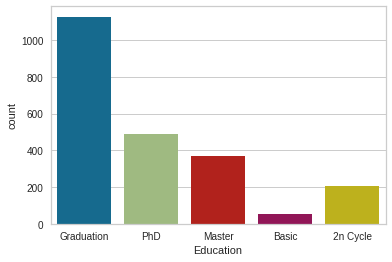

In [294]:
sns.countplot(data=df,x='Education');

- There are customers with 5 levels of education, with **Graduation** being the highest in number

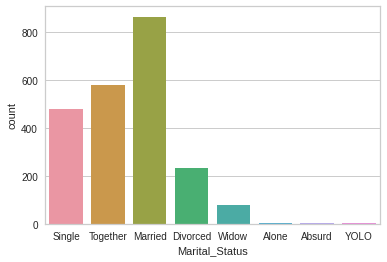

In [295]:
sns.countplot(data=df,x='Marital_Status');

- There are 8 types of marital status among customers, married being the most common

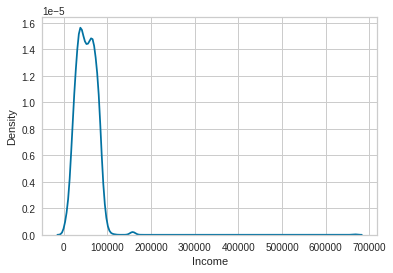

In [296]:
sns.kdeplot(df['Income']);

- From the above density plot, we can see that the **Income** features is right skewed, meaning there are relatively few customers with very high income

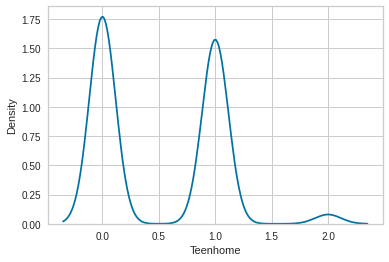

In [297]:
sns.kdeplot(df['Teenhome']);

- Customers have maximum of 2 and minimum of 0 teen children at home

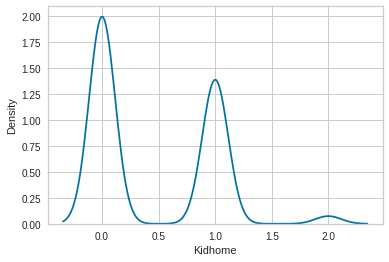

In [298]:
sns.kdeplot(df['Kidhome']);

- Customers have maximum of 2 and minimum of 0 kids at home

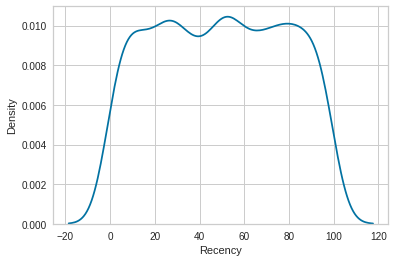

In [299]:
sns.kdeplot(df['Recency']);

- From the above distribution plot, it can be observed that majority of customers have purchase gap days in the range of 10 to 90 days.

# 2.4 Task 4 – EDA, Preprocessing
Bring the dataset into the form that you need for the experiments.
-  Explore the data and conduct necessary transformations.
-  If necessary, use different means of preprocessing until the dataset is suitable.

### Dropping irrelvant columns from the dataframe

In [300]:
# ID column is not a feature of the dataset so drop it
# Response is a target variable so dropping it since this is clustering task
df.drop(['ID','Response'],axis=1,inplace=True)

In [301]:
df[['Z_CostContact','Z_Revenue']].agg({'mean','max','min','median'})

,Z_CostContact,Z_Revenue
min,3.0,11.0
median,3.0,11.0
max,3.0,11.0
mean,3.0,11.0


In [302]:
df[['Z_CostContact','Z_Revenue']].nunique()

Z_CostContact    1
Z_Revenue        1
dtype: int64

In [303]:
# Columns Z_CostContact and Z_Revenue has all the rows filled with the same number, so this is not useful for any modeling or analysis
# so dropping them
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [304]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'],
      dtype='object')

### Dropping null values from the dataframe because it accounts for just over 1% so dropping them is a better idea rather than filling them with an assumptive mean value

In [305]:
df.dropna(inplace=True)

### Checking distribution of numerical features and treating them to make them closer to normal distribution

In [306]:
# list all real numerical features
numeric_cols_list = ['Income', 'Recency','MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [307]:
def displayDistributionPlot(data,nrow,ncol,cols):
    """
        This function takes
        pandas dataframe,
        no of rows and columns for subplots,
        and columns to plot as arguments. 
    """
    fig, axes = plt.subplots(nrow, ncol,figsize=(16,14))
    fig.tight_layout(h_pad=4.0,w_pad=4.0)
    count = 0
    for i in range(nrow):
        for j in range(ncol):
            if count>12:
                break
            sns.kdeplot(data[numeric_cols_list[count]],ax = axes[i,j])
            count+=1

    plt.show()

### Distribution plots before outliers treatment

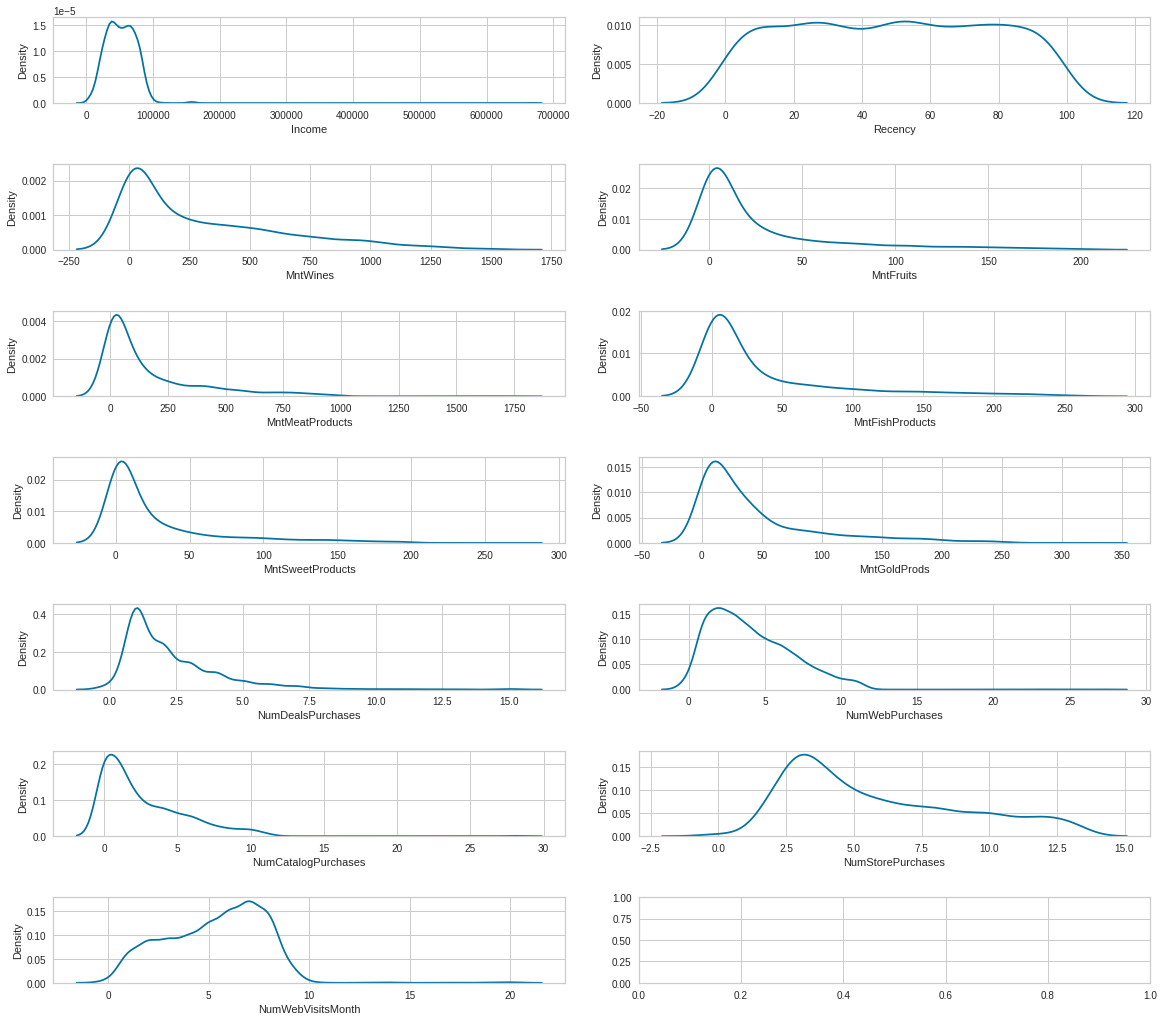

In [308]:
displayDistributionPlot(df,7,2,numeric_cols_list)

- From the above plots, it's observed that all the features need a treatment to remove their outliers and try to make their distribution normal (not ideally)
- To bring the features to a normal distribution(the most evenly distributed and desired distribution), I used an outlier treatment method using standard deviation (std)
- This method calculates zscore (std from the mean) for every datapoint and any data point outside the 3 standard deviations are treated as outliers and eliminates them

In [309]:
# standard deviation threshold/limit
zscore_thres = (-3,3)

for col in numeric_cols_list:
    # create a new column zscore to store datapoints std from the mean
    df['zscore'] = stats.zscore(df[col])
    # keep the records which are in the threshold range
    df = df[(df['zscore']>zscore_thres[0])&(df['zscore']<zscore_thres[1])]
    # drop zscore column as we don't need them now
    df.drop('zscore',axis=1,inplace=True)

### Distribution plots after outliers treatment


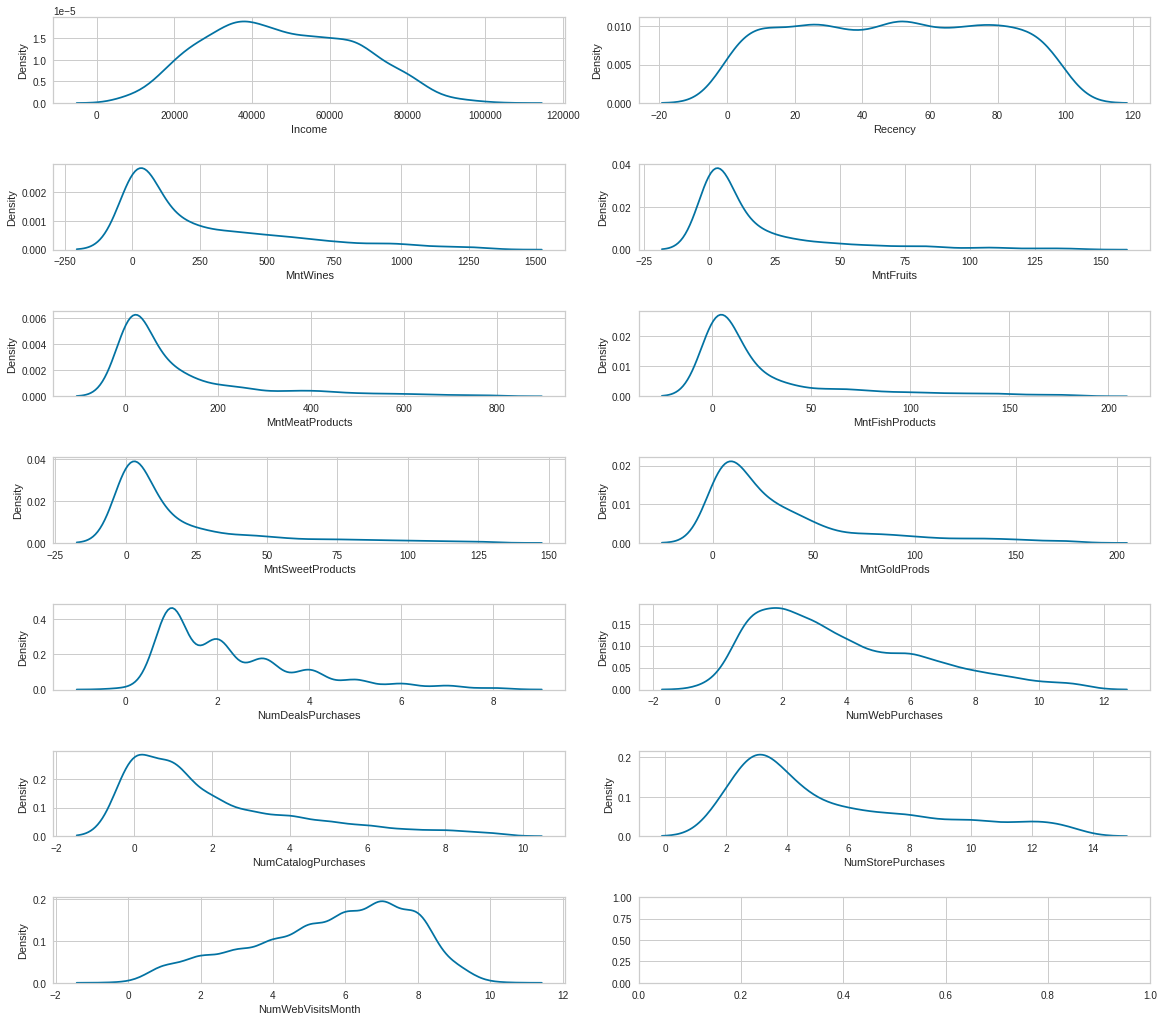

In [310]:
displayDistributionPlot(df,7,2,numeric_cols_list)

- As observed from the above graphs, the extreme values of the features are treated as outliers and are excluded
- This has reduced our num of rows in the dataframe

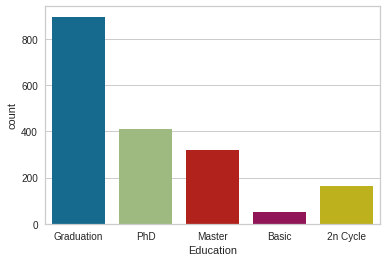

In [311]:
sns.countplot(data=df,x='Education');

- Converting categorical feature 'Education' string values to numeric
- Choosing ordinal numeric values assuming an order of education where PHD has the highest value

In [312]:
df['Education'].replace({'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4},inplace=True)

In [313]:
#confirming transformation with value_counts
df['Education'].value_counts()

2    896
4    410
3    318
1    163
0     53
Name: Education, dtype: int64

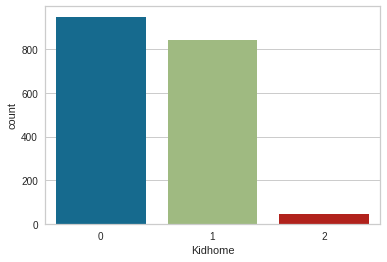

In [314]:
sns.countplot(data=df,x='Kidhome');

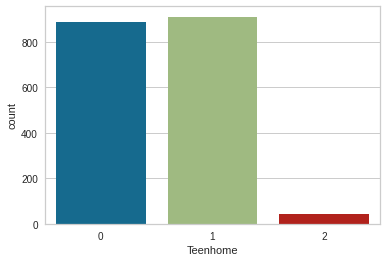

In [315]:
sns.countplot(data=df, x='Teenhome');

### As teenhome and kidhome features are very similar, I merged them into a new feature num_kids to present total num of kids of a customer

- This type of transformation of features are termed as feature engineering

In [316]:
df['num_kids'] = df['Kidhome'] + df['Teenhome']

In [317]:
# drop kidhome and teenhome features
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

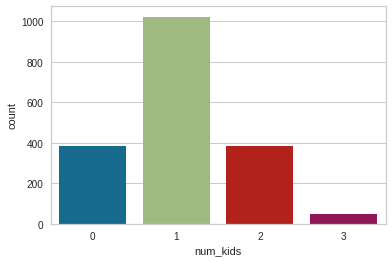

In [318]:
sns.countplot(data=df, x='num_kids');

### We are two features [Dt_Customer, Year_Birth] which represents date/year, so transforming their date values as days

In [319]:
def convertDateToDay(data_series):
    """
        Take pandas series as argument,
        converting it's values into num of days,
        and returning a list of days of in same order as pandas series
    """
    res_list = []
    today_str = date.today().strftime("%d-%m-%Y")
    today = datetime.strptime(today_str,"%d-%m-%Y")
    
    for i in data_series:
        if isinstance(i,str):
            this_date = datetime.strptime(i,"%d-%m-%Y")
        elif isinstance(i,int):
            this_date = datetime.strptime(str(i),"%Y")
            
        time_delta = (today-this_date).days
        res_list.append(time_delta)
        
    return res_list

In [320]:
# convert Dt_customer to num of days till now since the customer enrolled
enrolled_days_list = convertDateToDay(df['Dt_Customer'])
# add new feature for storing converted days
df['enrolled_days'] = enrolled_days_list 

In [321]:
# drop the old feature column
df.drop('Dt_Customer',axis=1,inplace=True) 

In [322]:
# convert Year_Birth to age (days)
age_list = convertDateToDay(df['Year_Birth'])
# add new feature for storing converted days
df['age'] = age_list

In [323]:
# drop the old feature column
df.drop('Year_Birth',axis=1,inplace=True) 

In [324]:
#confirming transformations
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'num_kids', 'enrolled_days', 'age'],
      dtype='object')

### 5 columns represents if a customer accepted a particular campaign, so these 1/0 (yes/no) features merged to create a numeric feature which counts total campaigns accepted by a customer 

- Reference for the code block below (line[11]): https://www.kaggle.com/code/yassinesfaihi/customer-clustering-pca-kmeans-and-agglomerative 

In [325]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [326]:
df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],axis=1,inplace=True)

### Create a new feature **total_amt_spent** by adding all amount spent on Wines, Fruits, Meat, Fish, Sweet and Gold

In [327]:
# create new feature for total spending in the last 2 years
df['total_amt_spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Create a new feature total_purchases by adding deals, store, catalog and we purchases

In [328]:
df['total_purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+ df['NumStorePurchases']

In [329]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'num_kids', 'enrolled_days', 'age',
       'Total_Campaigns_Accepted', 'total_amt_spent', 'total_purchases'],
      dtype='object')

In [330]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,num_kids,enrolled_days,age,Total_Campaigns_Accepted,total_amt_spent,total_purchases
1,2,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,2,3333,25314,0,27,6
2,2,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,3532,21296,0,776,21
3,2,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,1,3359,14357,0,53,8
4,4,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,1,3381,15452,0,422,19
5,3,Together,62513.0,16,520,42,98,0,42,14,2,6,4,10,6,0,1,3513,20566,0,716,22


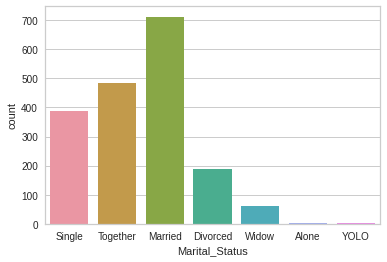

In [331]:
sns.countplot(data=df,x='Marital_Status');

- Converting categorical feature 'Marital Status' string values to dummy variables since there is no order for this feature

In [332]:
df['Marital_Status'].replace(['Married','Together'],'Together',inplace=True)
df['Marital_Status'].replace(['Single','Alone'],'Single',inplace=True)
df['Marital_Status'].replace(['Divorced','Widow'],'Was_married',inplace=True)

In [333]:
# since absurd and yolo types don't go with any one of the above categories
# however, they are small in number so it's safe to drop them
df = df[~df['Marital_Status'].isin(['Absurd','YOLO'])]

In [334]:
#creating dummies variables as new feature columns and assign a variable to the new dataframe 
new_df = pd.get_dummies(df, columns=["Marital_Status"])

In [335]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838 entries, 1 to 2239
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education                   1838 non-null   int64  
 1   Income                      1838 non-null   float64
 2   Recency                     1838 non-null   int64  
 3   MntWines                    1838 non-null   int64  
 4   MntFruits                   1838 non-null   int64  
 5   MntMeatProducts             1838 non-null   int64  
 6   MntFishProducts             1838 non-null   int64  
 7   MntSweetProducts            1838 non-null   int64  
 8   MntGoldProds                1838 non-null   int64  
 9   NumDealsPurchases           1838 non-null   int64  
 10  NumWebPurchases             1838 non-null   int64  
 11  NumCatalogPurchases         1838 non-null   int64  
 12  NumStorePurchases           1838 non-null   int64  
 13  NumWebVisitsMonth           1838 

In [336]:
new_df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,num_kids,enrolled_days,age,Total_Campaigns_Accepted,total_amt_spent,total_purchases,Marital_Status_Single,Marital_Status_Together,Marital_Status_Was_married
1,2,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,2,3333,25314,0,27,6,1,0,0
2,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,3532,21296,0,776,21,0,1,0
3,2,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,1,3359,14357,0,53,8,0,1,0
4,4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,1,3381,15452,0,422,19,0,1,0
5,3,62513.0,16,520,42,98,0,42,14,2,6,4,10,6,0,1,3513,20566,0,716,22,0,1,0


### Transforming raw data into standarized format, so that all features would be on a similar scale, this way larger valued data points or features wouldn't influence the clustering more than it should. Because large valued feature doesn't mean more crucial than other lower-valued features.

In [337]:
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(new_df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns= new_df.columns)

In [338]:
scaled_df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,num_kids,enrolled_days,age,Total_Campaigns_Accepted,total_amt_spent,total_purchases,Marital_Status_Single,Marital_Status_Together,Marital_Status_Was_married
0,-0.460711,-0.068884,-0.381426,-0.775966,-0.606782,-0.680272,-0.610720,-0.623408,-0.721944,-0.203719,-1.080788,-0.447873,-1.093135,-0.291280,-0.104886,1.317594,-1.164885,1.278710,-0.393986,-0.857531,-1.037415,1.920619,-1.364891,-0.396775
1,-0.460711,1.269006,-0.798041,0.557718,1.147527,0.091244,2.259190,0.140551,0.235900,-0.837281,1.628235,0.003438,1.441311,-0.761318,-0.104886,-1.458036,-0.167909,0.339956,-0.393986,0.631329,1.021731,-0.520666,0.732659,-0.396775
2,-0.460711,-1.111812,-0.798041,-0.775966,-0.497138,-0.591006,-0.400084,-0.547012,-0.748551,-0.203719,-0.693785,-0.899184,-0.459523,0.178758,-0.104886,-0.070221,-1.034627,-1.281253,-0.393986,-0.805849,-0.762862,-0.520666,0.732659,-0.396775
3,1.497179,0.563767,1.562782,-0.255347,0.928238,0.033858,0.547776,0.369739,-0.482483,1.696967,0.467225,0.454748,0.174088,-0.291280,-0.104886,-0.070221,-0.924408,-1.025420,-0.393986,-0.072351,0.747178,-0.520666,0.732659,-0.396775
4,0.518234,0.787198,-1.145221,0.859805,0.891690,-0.093665,-0.663379,0.942708,-0.509090,-0.203719,0.854229,0.906059,1.441311,0.178758,-0.104886,-0.070221,-0.263098,0.169401,-0.393986,0.512061,1.159007,-0.520666,0.732659,-0.396775


# 2.5 Task 5 – Clustering

Use clustering to identify different groups of instances in your dataset.
- Do NOT use dimensionality reduction in this step!
- Choose two different clustering methods to analyze (aspects of) the data. Select reasonable
parametrizations and use additional steps to find good choices.
- To yield meaningful results, further steps beyond the plain application of an algorithm are
relevant and therefore expected. E.g., computing silhouette coefficients and diagrams does
not count as one of the two methods but is part of the expected additional steps to find a good
parameter for 𝑘-Means and to interpret the result.
- If your chosen methods rely on hyperparameters, optimize them or present domain arguments
for their choice.
- Interpret the results.

## 2.5.1 - KMeans Clustering (1st clustering algorithm)

In [339]:
def getKMeans(n_clusters, random_state=100, n_init=20, max_iter=100,tol=0.00001):
    """
        The function takes cluster size, seed number, cost difference tolerance, etc. as arguments
        and return KMeans object
    """
    return KMeans(
        n_clusters = n_clusters,
        random_state = random_state,
        n_init = n_init,
        init = 'k-means++',
        max_iter = max_iter,
        tol=tol 
    )

In [340]:
def KMeansSihouettePlot(dataframe,max_cluster_size,random_state=100,n_init=20,max_iter=100,tol=0.00001,color=None):
    """
        The function takes pandas dataframe, maximum cluster number to plot as the most important arguments.
        It calculates KMeans for different cluster size and plot their Sihoutte scores 
    """  
    silhouette_coefficients = []
    for n in range(2, max_cluster_size):
        kmeans = getKMeans(n,random_state,n_init,max_iter,tol)
        cluster_labels = kmeans.fit_predict(dataframe)
        silhouette_coefficients.append(silhouette_score(dataframe,cluster_labels))
        plt.plot(range(2,n+1), silhouette_coefficients,color=color)
        plt.title("Silhouette Coefficient Scores Plot")
        plt.xlabel("Cluster size (n)")
        plt.ylabel("Silhouette Coefficient Score")

In [341]:
def sihouetteVisualizer(dataframe, estimator):
    """
        The function takes pandas dataframe and a Sklean clusterer as arguments
        to fit the Silhouette visualizer and plot silhouette coefficient for each sample on cluster basis
    """
    model = SilhouetteVisualizer(estimator)
    model.fit(dataframe)
    model.finalize()

In [342]:
scaled_df.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'num_kids', 'enrolled_days', 'age',
       'Total_Campaigns_Accepted', 'total_amt_spent', 'total_purchases',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Was_married'],
      dtype='object')

#### KMeans is an algorithm that works the best for numerical features, there is a different algorithm called KModes for categorical features. Since, in the dataset have we have alot of numeric features so leaving out categorical features:
- Marital_Status_Was_married
- Marital_Status_Together
- Marital_Status_Single
- Education

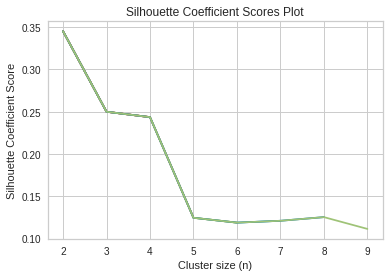

In [343]:
numeric_scaled_df = scaled_df[['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','num_kids',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'enrolled_days', 'age', 'Total_Campaigns_Accepted','total_amt_spent',
       'total_purchases']]

X = numeric_scaled_df
KMeansSihouettePlot(X, 10)

- From the above sihouette coefficient scores plot, it is observed that at cluster size = 2, we get score of just about 0.35.
- The score is under the acceptable limit of 0.5

/home/darth/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


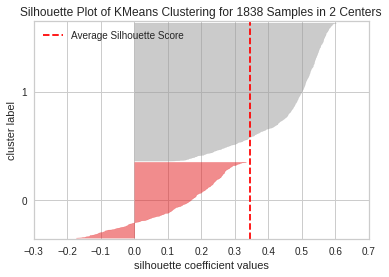

In [344]:
X = numeric_scaled_df
kmeans = getKMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X)
sihouetteVisualizer(X, kmeans)

- The cluster 1 has a good structure, however the cluster 0 has a very weak and negative structure.
- This indicates that datapoints are misclassified among clusters.
- KMeans has performed very bad maybe because we might have datapoints are very close to each other(no distinguisable boundary) which makes it challenging to have clusters of great structure 

#### Plotting data points in 3D for better visualization by selecting 3 features to plot

In [345]:
# Code reference:https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

def plot3d(dataframe, colors, cluster_labels,idx_list):
    """
        The function takes pandas dataframe for input data points,
            colors for list of colors to assign respective clusters,
            cluster_labels to assign each datapoint it's respective cluster,
            and idx_list to get the index of each column/feature that the datapoints belong 
    """
    X = dataframe
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')

    for i, color in enumerate(colors):
        new_X = X.iloc[cluster_labels==i, :]
        ax.scatter(new_X.iloc[:,idx_list[0]], new_X.iloc[:,idx_list[1]],new_X.iloc[:,idx_list[2]], c=colors[i], label=i)
        ax.set_xlabel(new_X.columns[idx_list[0]])
        ax.set_ylabel(new_X.columns[idx_list[1]])
        ax.set_zlabel(new_X.columns[idx_list[2]])

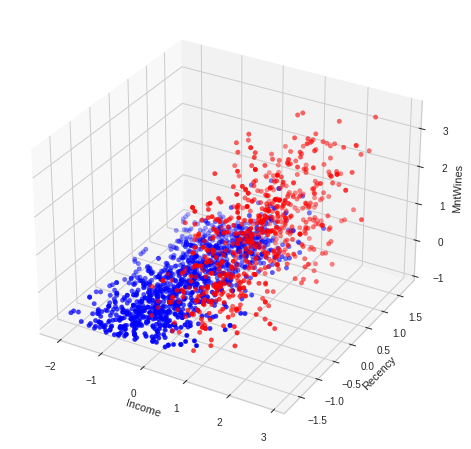

In [346]:
colors = ['red','blue']
plot3d(numeric_scaled_df,colors,cluster_labels,[0,1,2])

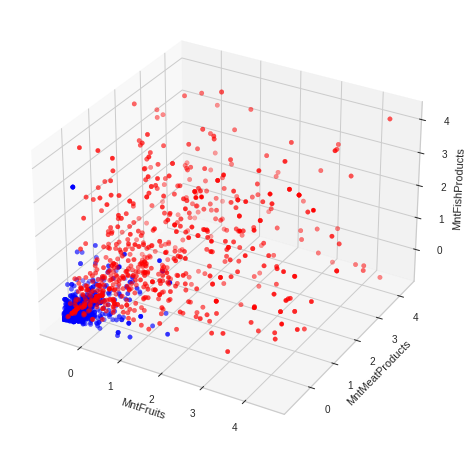

In [347]:
colors = ['red','blue']
plot3d(numeric_scaled_df,colors,cluster_labels,[3,4,5])

- As suspected, there is no distinguisable boundary between the assigned clusters at least when plotted in 3d with first three features

## 2.5.2 -  OPTICS (2nd clustering algorithm)

- Optics is a modified form of DBSCAN which can be visaulized better at different values of epsilon.
- One of the main parameter in Optics is min_samples.
- As a rule of thumb, we generally set min_samples > no of features + 1
- And, if the features length is large, we tend to go with min_sample = 2*n_features
- Therefore, using 2*n_cols as min_samples

In [348]:
# Code reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py

X = numeric_scaled_df
optics = OPTICS(min_samples=2*X.shape[1],cluster_method='xi')
optics.fit(X)

space = np.arange(len(X))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]
print(set(labels))

{0}


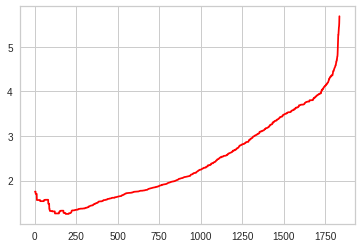

In [349]:
colors = ["red"]
for idx, color in enumerate(colors):
    Xk = space[labels == idx]
    Rk = reachability[labels == idx]
    plt.plot(Xk, Rk, color)
    
plt.plot(space[labels == -1], reachability[labels == -1], "black")

- Optics here fails miserably.
- Optics is unable to find clusters in the datasets. The major probable reason for this failure might be a very sparse datapoints with very different densities within groups of data.
- Different density as in the sense that, one group/cluster might be tightly closer with each other while other groups might be sparsely clusters. This would make very difficult to adjust a perfect epsilon value which accounts for both.

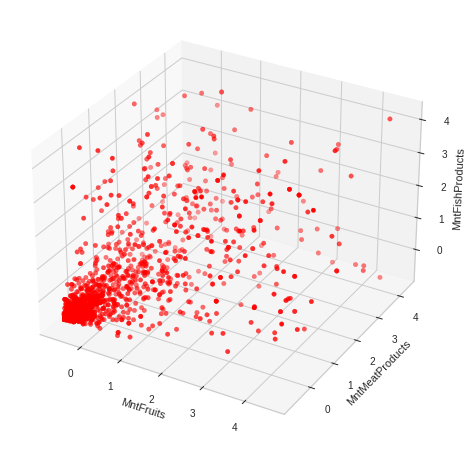

In [350]:
colors = ['red','blue']
labels = optics.labels_[optics.ordering_]
plot3d(numeric_scaled_df,colors,labels,[3,4,5])

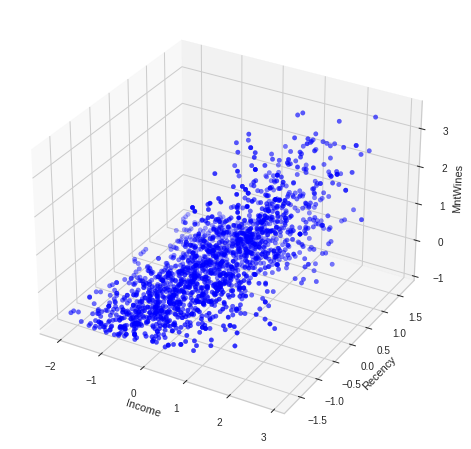

In [351]:
colors = ['blue','red']
plot3d(numeric_scaled_df,colors,labels,[0,1,2])

- The above 3d plots verifies the suspect of no clustering generated by Optics algorithm

# 2.6 Task 6 – Dimensionality Reduction
Use dimensionality reduction to analyze the dataset and reduce the data meaningfully.
- Run a dimensionality reduction on the dataset.
- Discuss and explain the results.
- Choose a reasonable number of dimensions.

### Using PCA to reduce dimension of the dataset and using PCA features for reruning clustering algorithms as done above.

In [352]:
from sklearn.decomposition import PCA

pca = PCA()
pca_transformed = pca.fit_transform(numeric_scaled_df)
df_pca = pd.DataFrame(pca_transformed, index=numeric_scaled_df.index)
df_pca.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-2.53,-0.63,1.82,-0.99,-0.44,0.44,0.63,0.40,-0.05,0.13,0.29,0.07,-0.20,0.15,0.18,-0.11,0.15,0.0,0.0
1,3.13,-0.81,-0.37,-0.62,-1.06,0.19,-1.25,-0.42,0.88,-0.11,0.11,-0.31,1.95,0.24,-0.41,-0.36,0.08,-0.0,-0.0
2,-2.52,-0.90,-0.32,0.24,-0.83,-1.19,-0.35,-0.19,0.06,-0.11,0.01,0.21,0.05,-0.29,0.06,0.08,-0.24,0.0,-0.0
3,0.89,0.53,-0.22,-1.18,1.23,-2.02,0.07,-0.47,0.53,-0.58,-0.10,0.87,0.03,0.48,-0.09,-0.26,0.60,0.0,-0.0
4,1.98,0.44,0.40,-0.23,-1.26,-0.33,-0.53,-1.22,0.47,0.76,-0.64,-0.65,-0.56,0.03,0.90,-0.00,0.30,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,-2.90,-0.86,-0.54,0.17,1.20,0.31,0.01,-0.07,0.08,0.20,0.23,-0.13,0.07,-0.06,-0.00,-0.11,0.27,-0.0,-0.0
1834,0.05,3.60,3.80,-0.47,-0.09,-1.01,1.04,0.28,1.26,-0.39,0.28,0.47,-0.04,0.31,-0.22,-0.04,0.11,-0.0,0.0
1835,2.82,-1.16,0.26,1.71,1.65,-1.08,-0.59,-1.02,0.19,0.81,-0.82,0.58,0.79,-1.85,1.07,0.01,0.44,0.0,0.0
1836,3.34,-0.42,1.10,-1.16,-1.65,0.02,-0.53,0.25,-0.18,-0.40,0.31,-0.23,0.55,0.09,0.49,0.29,-0.07,-0.0,0.0


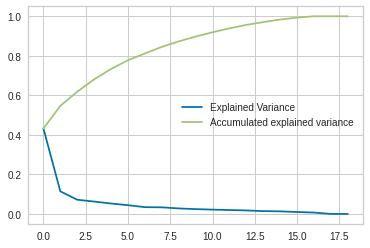

In [353]:
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance,label='Explained Variance')
plt.plot(np.add.accumulate(explained_variance),label='Accumulated explained variance')
plt.legend()

In [354]:
explained_variance.round(2)

array([0.43, 0.11, 0.07, 0.06, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02, 0.02,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ])

In [355]:
np.add.accumulate(explained_variance*100)

array([ 43.23743395,  54.65740425,  61.82643873,  68.07954027,
        73.34319456,  77.75937264,  81.17756516,  84.50661485,
        87.28480286,  89.7178961 ,  91.89536112,  93.85567812,
        95.62630485,  97.04206592,  98.3477206 ,  99.31717984,
       100.        , 100.        , 100.        ])

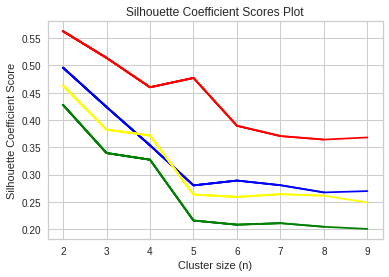

In [356]:
colors = ['red','blue','yellow','green']
for n in range(2,6):
    X = df_pca.iloc[:,:n]
    KMeansSihouettePlot(X, 10,color=colors[n-2])

- From the above explained variance plot, accumulation results and the  silhouette coeffficient scores plot, it can observed that the first 2 features explains 54.65% variance and performs the best in terms of sihouette score.
- So, selecting first 2 features as new pca features and will be using it on developing clusters.

In [357]:
pca_data = df_pca.iloc[:,:2]

# 2.7 Task 7 – Clustering II
Re-run you clustering approaches from Task 5 on the reduced dataset from Task 6.
- Rerun both clustering algorithms.
- Keep in mind, that for the dataset at hand, different hyperparameter settings might be required.
- Compare the results to those of Task 5.

## 2.7.1 KMEANS on PCA

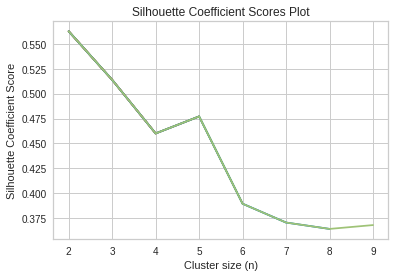

In [358]:
X = pca_data
KMeansSihouettePlot(X, 10)

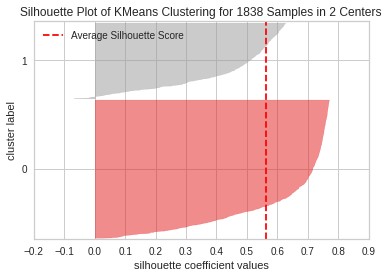

In [359]:
kmeans = getKMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X)
sihouetteVisualizer(X, kmeans)

- The sihoutte coefficient score improved significantly from 0.3 to 0.57.
- The cluster 0 has a strong structure which more than 80% data points above 0.6 score
- The cluster 1 on an average has over 0.5 score with a bit of negative scored datapoints indicating some of them to be misclassified.
- This indicates that there is no distinctive boundary and clusters are close to each other.

In [360]:
def plot2d(dataframe, colors, cluster_labels,idx_list):
    """
        The function takes pandas dataframe for input data points,
            colors for list of colors to assign respective clusters,
            cluster_labels to assign each datapoint it's respective cluster,
            and idx_list to get the index of each column/feature that the datapoints belong 
    """
    X = dataframe
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')

    for i, color in enumerate(colors):
        new_X = X.iloc[cluster_labels==i, :]
        ax.scatter(new_X.iloc[:,idx_list[0]], new_X.iloc[:,idx_list[1]], c=colors[i], label=i)
        ax.set_xlabel(new_X.columns[idx_list[0]])
        ax.set_ylabel(new_X.columns[idx_list[1]])

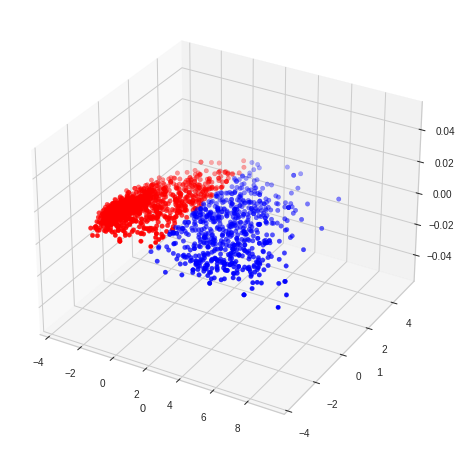

In [361]:
colors = ['red','blue']
plot2d(pca_data,colors,cluster_labels,[0,1])

- Since we have chosen just two PCA features, we have only two columns in our pca dataframe and the above 3d plot is actually plotted based on just 2d features

## 2.7.2 OPTICS on PCA

In [362]:
X = pca_data
# cols = X.shape[1]
optics = OPTICS(min_samples=2*pca_data.shape[1])
optics.fit(X)

space = np.arange(len(X))
reachability = optics.reachability_[optics.ordering_]
optics_labels = optics.labels_[optics.ordering_]
print(set(optics_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, -1}


/home/darth/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


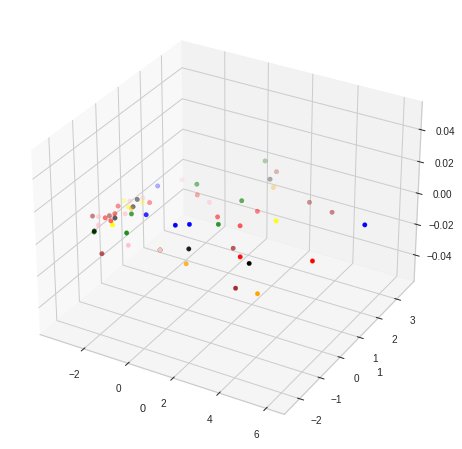

In [363]:
# There are 167 clusters according to above algorithm and passing that many colors is simply non-practical
# so plotting with colors 
colors = ['red','blue','green','yellow','orange','brown','pink','black']
plot2d(pca_data,colors,optics_labels,[0,1])

In [364]:
random_optics_labels = [0,5,10,12,100,161,125]
print('Taking random clusters to check their data points count')
for i in random_optics_labels: 
    print('No of data points/rows in the cluster {} = {}'.format(i,X[optics_labels==i].count()[0]))

Taking random clusters to check their data points count
No of data points/rows in the cluster 0 = 11
No of data points/rows in the cluster 5 = 8
No of data points/rows in the cluster 10 = 5
No of data points/rows in the cluster 12 = 5
No of data points/rows in the cluster 100 = 7
No of data points/rows in the cluster 161 = 4
No of data points/rows in the cluster 125 = 7


- From the above Optics DBSCAN results, we found 167 clusters on a PCA data.
- Optics performed even poor with PCA data because it is trying to make clusters with very 4 points.
- It is also quite observant from the above results that each cluster has very few data points

# 2.8 Task 8 – Cluster Interpretation
Visualize and discuss properties of the clusters.
- Pick one of the clusterings you computed in Task 5 or Task 7. Explain you choice!
- Visualize the clustering.
- Present properties of the individual clusters in a suitable way, compare them and discuss.

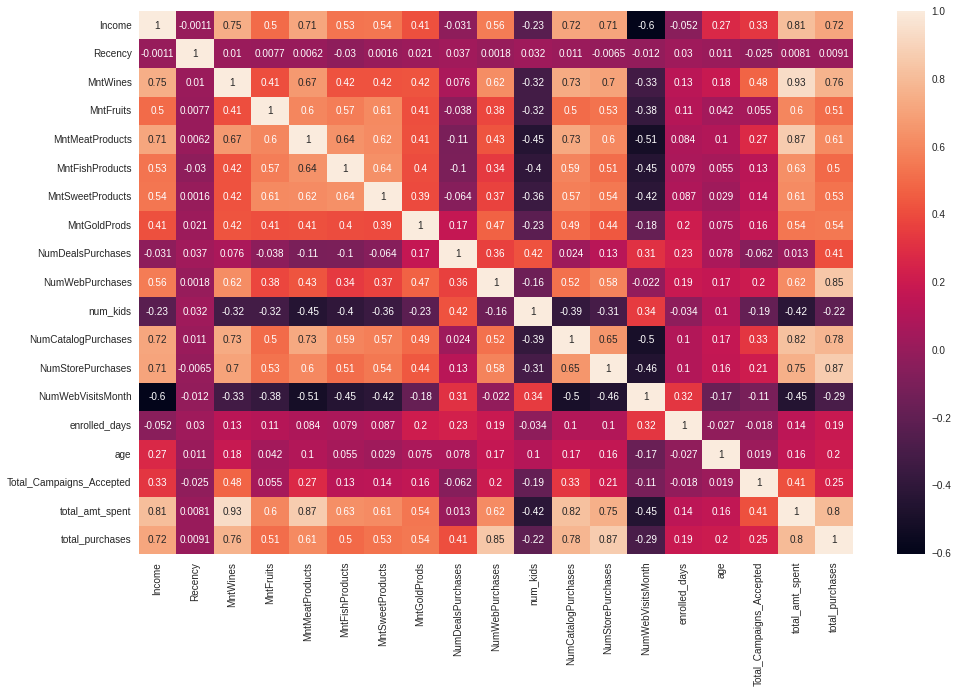

In [365]:
plt.figure(figsize=((16,10)))
sns.heatmap(numeric_scaled_df.corr(),annot=True);


### Among 4 clusterings, I have selected **KMeans on PCA** clustering due to the following reasons:


- It has the best sihouette coefficient score than KMeans on without PCA.
- The numeric features of the dataset have a good correlation between each others as we can observe from the above heatmap. For examples:
    - Income and Total_amt_spent (0.81), total_purchase and income (0.72),total_purchases and total_amt_spent(0.8),mntfistproducts and mntmeatproducts(0.64) and numwebvisitsmonth and income (-0.6)
- High correlation between features indicates that we can achieve high variance principal component features within small range as we observed the first 2 PCA features explained about 55% variance.
- The DBSCAN/Optics algorithm weren't able to create clusters because of very sparse densities among different features. Also, there is no clear boundary between potential clusters which is why this algorithm failed.
- Also, on visualizing data points, we have seen that they form circular patterns which is why KMeans on PCA performed better than Optics/DBSCAN

### To visualize individual clusters and present their properties, we will put cluster labels on our unscaled dataframe and plot datapoints based on different features and compare the clusters

In [366]:
# using our winning clustering model
X_pca_final = pca_data
kmeans = getKMeans(n_clusters=2)
final_cluster_labels = kmeans.fit_predict(X_pca_final)

In [367]:
#df is our the initial dataframe from which we scaled and modeled clustering algorithms
df['cluster'] = final_cluster_labels

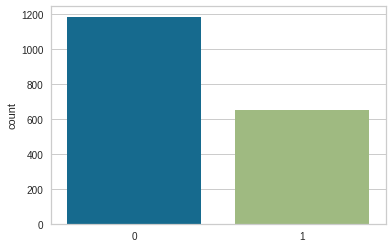

In [368]:
sns.countplot(x=final_cluster_labels)
plt.show()

- Cluster 0 is bigger in size than cluster 1

In [369]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,num_kids,enrolled_days,age,Total_Campaigns_Accepted,total_amt_spent,total_purchases,cluster
1,2,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,2,3333,25314,0,27,6,0
2,2,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,3532,21296,0,776,21,1
3,2,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,1,3359,14357,0,53,8,0
4,4,Together,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,1,3381,15452,0,422,19,1
5,3,Together,62513.0,16,520,42,98,0,42,14,2,6,4,10,6,0,1,3513,20566,0,716,22,1


- Even though we didn't categorical variables for clustering, we can still use them to evaluate our clusters using domain knowledge

In [370]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'num_kids', 'enrolled_days', 'age',
       'Total_Campaigns_Accepted', 'total_amt_spent', 'total_purchases',
       'cluster'],
      dtype='object')

In [373]:
# finding mean for continuous numerical variables after grouping based on clusters
df[['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'num_kids', 'enrolled_days', 'age',
       'Total_Campaigns_Accepted', 'total_amt_spent', 'total_purchases',
       'cluster']].groupby('cluster').mean()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,num_kids,enrolled_days,age,Total_Campaigns_Accepted,total_amt_spent,total_purchases
cluster,,,,,,,,,,,,,,
0,37013.652064,48.889638,2.305813,2.635215,0.729570,3.620893,6.362258,0.011794,1.255265,3550.307498,19337.814659,0.101938,141.047178,9.291491
1,67029.723502,49.162826,2.350230,5.903226,4.294931,8.786482,4.265745,0.009217,0.677419,3593.244240,20758.316436,0.450077,1037.038402,21.334869


In [374]:
# converting back the education values to string categories for better interpretation
df['Education'].replace({0:'Basic',1:'2n Cycle',2:'Graduation',3:'Master',4:'PhD'},inplace=True)

In [375]:
df[['Education','Marital_Status','cluster']].groupby('cluster').agg(pd.Series.mode)

,Education,Marital_Status
cluster,,
0,Graduation,Together
1,Graduation,Together


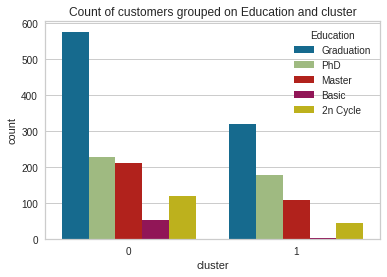

In [411]:
sns.countplot(data=df,hue='Education',x='cluster')
plt.title('Count of customers grouped on Education and cluster');

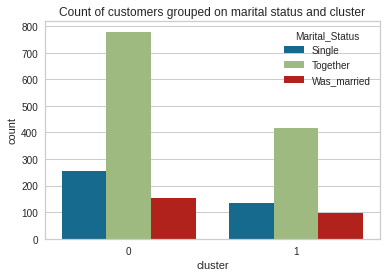

In [376]:
sns.countplot(data=df,hue='Marital_Status',x='cluster')
plt.title('Count of customers grouped on marital status and cluster');

- Both cluster 0 and 1 has similar proportions of marital status
- Cluster 0 count is more than cluser 1

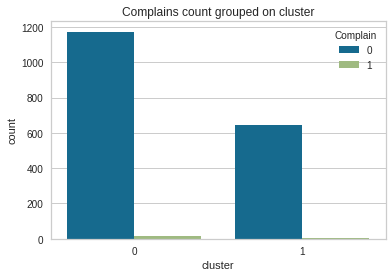

In [377]:
sns.countplot(data=df,hue='Complain',x='cluster')
plt.title('Complains count grouped on cluster');

- Both clusters has dominant 'no-complain' values
- Cluster 0 datapoints count is higher than cluster 1

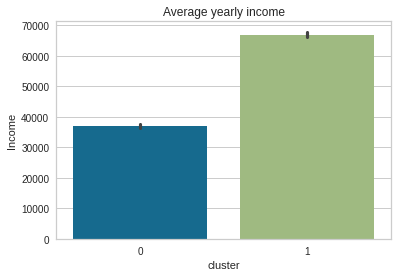

In [378]:
sns.barplot(data=df,y='Income',x='cluster')
plt.title('Average yearly income');

- Cluster 1 customers on an average have nearly double income compared to cluster 0

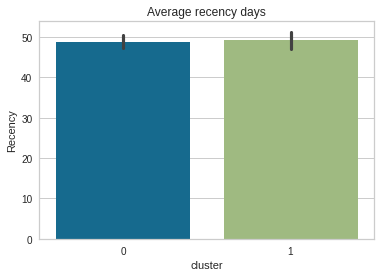

In [379]:
sns.barplot(data=df,y='Recency',x='cluster')
plt.title('Average recency days');

- Cluster 0 and 1 both have very comparble recency

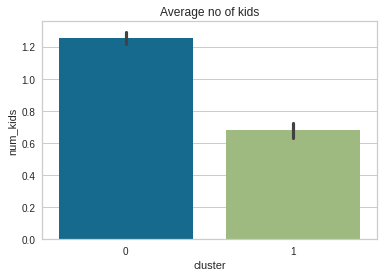

In [380]:
sns.barplot(data=df,y='num_kids',x='cluster')
plt.title('Average no of kids');

- Cluster 0 has nearly double num_kids(avg) than cluster 1

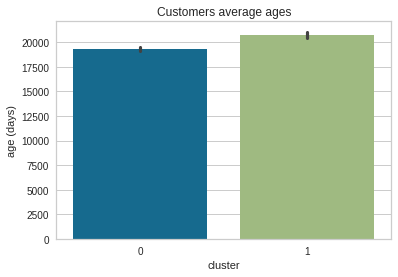

In [381]:
fig, ax = plt.subplots()
sns.barplot(data=df,y='age',x='cluster')
ax.set_ylabel('age (days)')
plt.title('Customers average ages');

- Customer 0 and 1 both have comparable ages (avg) with cluster 1 being slightly more

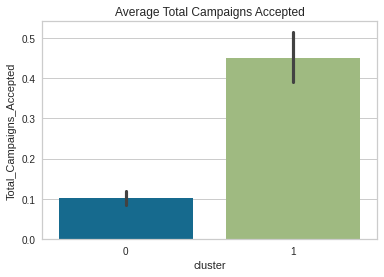

In [382]:
sns.barplot(data=df,y='Total_Campaigns_Accepted',x='cluster')
plt.title('Average Total Campaigns Accepted');

- Cluster 1 has total_campagins_accepted(avg) 4.5 times of cluster 0

In [383]:
df[['total_amt_spent','cluster']].groupby('cluster').mean()

,total_amt_spent
cluster,
0,141.047178
1,1037.038402


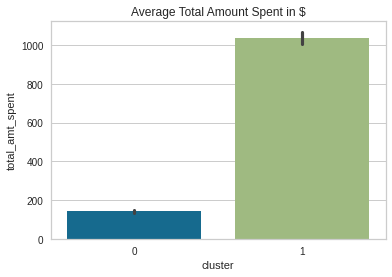

In [384]:
sns.barplot(data=df,y='total_amt_spent',x='cluster')
plt.title('Average Total Amount Spent in $');

- Cluster 1 has average total_amt_spent of over 1000 while cluster 0 has about 141 in $

In [385]:
grouped = df[['MntWines','MntFruits', 'MntMeatProducts',\
    'MntFishProducts', 'MntSweetProducts','MntGoldProds','cluster']].groupby('cluster').mean()
grouped

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
cluster,,,,,,
0,73.827296,5.515586,29.765796,8.103623,5.393429,18.441449
1,578.158218,39.640553,263.889401,56.359447,39.067588,59.923195


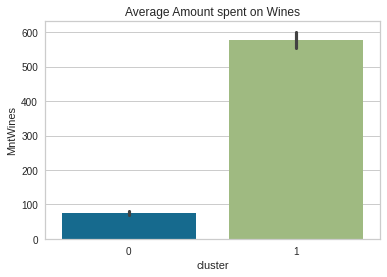

In [386]:
sns.barplot(data=df,x='cluster',y='MntWines')
plt.title('Average Amount spent on Wines');

- Cluster 1 has very high mntwines value on average compared to cluster 0

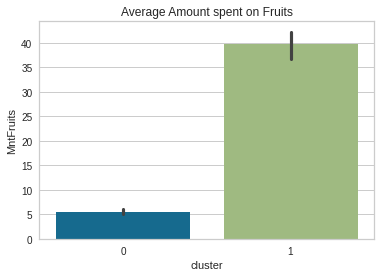

In [387]:
sns.barplot(data=df,x='cluster',y='MntFruits')
plt.title('Average Amount spent on Fruits');

- Cluster 1 has significantly higher average mntfruits value than cluster 0

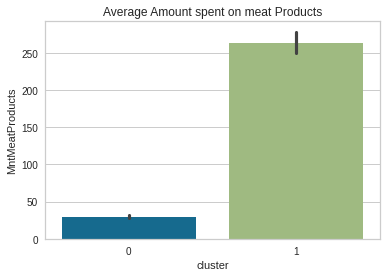

In [388]:
sns.barplot(data=df,x='cluster',y='MntMeatProducts')
plt.title('Average Amount spent on meat Products');

- Cluster 1 has significantly higher average mntfruits value than cluster 0

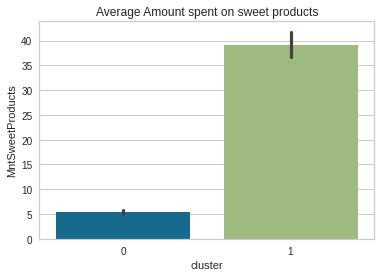

In [389]:
sns.barplot(data=df,x='cluster',y='MntSweetProducts')
plt.title('Average Amount spent on sweet products');

- Cluster 1 has significantly higher average mntfruits value than cluster 0

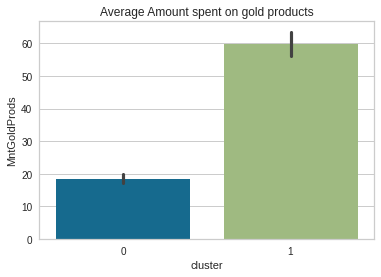

In [391]:
sns.barplot(data=df,x='cluster',y='MntGoldProds')
plt.title('Average Amount spent on gold products');

- Cluster 1 has significantly higher average mntfruits value than cluster 0

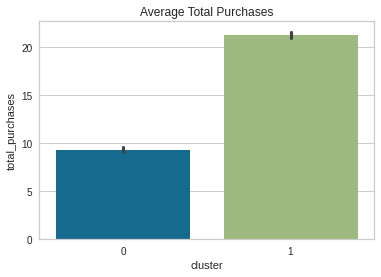

In [399]:
sns.barplot(data=df,y='total_purchases',x='cluster')
plt.title('Average Total Purchases');

- Cluster 1 with purchases of 22 has higher total purchases than cluster 0 with 9

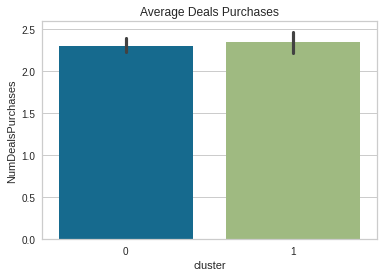

In [403]:
sns.barplot(data=df,y='NumDealsPurchases',x='cluster')
plt.title('Average Deals Purchases');

- Cluster 0 and 1 have similar num of deals purchases

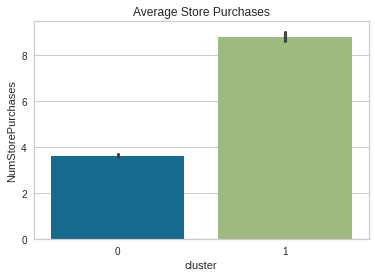

In [407]:
sns.barplot(data=df,y='NumStorePurchases',x='cluster')
plt.title('Average Store Purchases');

Cluster 1 has higher average store purchases than cluster 0

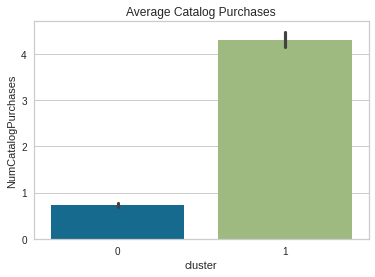

In [406]:
sns.barplot(data=df,y='NumCatalogPurchases',x='cluster')
plt.title('Average Catalog Purchases');

Cluster 1 has higher average catalog purchases than cluster 0

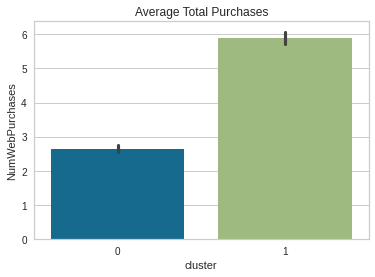

In [405]:
sns.barplot(data=df,y='NumWebPurchases',x='cluster')
plt.title('Average Web Purchases');

Cluster 1 has nearly double average web purchases than cluster 0

In [393]:
df[['NumWebVisitsMonth','cluster']].groupby('cluster').mean()

,NumWebVisitsMonth
cluster,
0,6.362258
1,4.265745


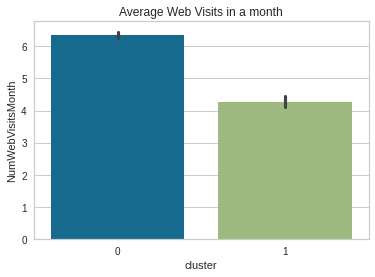

In [409]:
sns.barplot(data=df,y='NumWebVisitsMonth',x='cluster')
plt.title('Average Web Visits in a month');

- Cluster 0 on average visits webvisits more than cluster 1

In [395]:
df[['enrolled_days','cluster']].groupby('cluster').mean()

,enrolled_days
cluster,
0,3550.307498
1,3593.244240


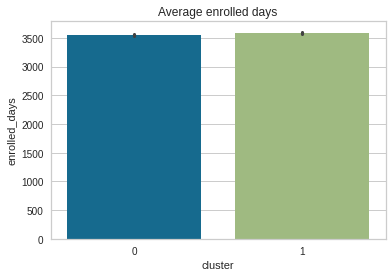

In [408]:
sns.barplot(data=df,y='enrolled_days',x='cluster')
plt.title('Average enrolled days');

- Both clusters have very similar enrolled_days(avg)

# 2.9 Task 9 – Conclusions and Future Work

## 2.9.1 Summarize and interpret the achieved results

### Summary
- We have two clusters '0' and '1' with 1187 and 651 records respectively.
- Cluster 0 groups customers with the following characteristics:
    - significantly higher average web visits
    - significantly lower average purchases in all forms (web,catalog,in-store) except for deals type
    - significantly lower average amount spent on all product categories
    - significantly lower average annual income
    - higher average num of kids
    - less likely to accept marketing campaigns
- Cluster 1 groups customers with the following characteristics:
    - significantly lower average web visits
    - significantly higher average purchases in all forms (web,catalog,in-store) except for deals type
    - significantly higher average amount spent on all product categories
    - significantly higher average annual income
    - lower average num of kids
    - more likely to accept marketing campaigns
    
### Interpretation
- Customers belonging to cluster 0 are lower-income people because they have lower annual income, and spend significantly lesser than customers belonging to cluster 1  on all the product categories.
- Cluster 0 customers are price-sensitive because they make less purchases compared to cluster 1 in all forms except when there are deals on the stores/outlets. This confirms that these customers are quite price-sensitive.
- Also, customers from cluster 1 have lower number of kids so that they have more time to visit stores in-person. This explains why their number of company website visits is lesser than cluster 0 
- Cluster 0 customers tend to have more kids. This explains their low spending in the outlets because they would need to invest more in their kids health and education, which are more important.
- The features such as the age, education and marital status, enrolled_days don't reveal too much information

## 2.9.2 Compare to the original plan (Task 1)

- We wanted to find out which products are the most desired product categories that customers tend to spend on. Since, product categories have different price ranges, meaning some categories are expensive than others so just amount itself don't reveal much. However, when you calculate cluster 0 and cluster 1 amount spent proportions on different products, gold products have the highest ratio (3/10). This reveals that lower-income groups tend to spend good proportion in gold products relative to other product categories.

- We wanted to find out what forms of advertisement would be effective to certain groups of customers. The customers from cluster 0 visits the store's website so for them marketing in web versions is more effective.

- We wanted to figure out shopping forms preferred by different groups. Cluster 0 customers have significantly lower purchases in every shopping form except for deals type. This implies that if there are deals in products, both groups tend to purchase similar no of times.

## 2.9.3 Explain the generated value

- Both clusters have some similarities but there are several features which makes each distinctive.
- From this project, we have now low and high income groups. So, if we get the income data of a new customer, we can advertise them about the campaign in their preferred form (web/in-person)
- We have known that gold products are something both groups tend to purchase more relatively. So, deals/discounts on other products would attract both groups more.
- Also, low-income group are less prone to marketing campaigns and are active in web so spending less cost on the web advertisements would be effective.
- We have also found that cluster 0 have more kids, so deals on child products might increase their spending.

## 2.9.4 Recommend a course of action for the organization in your story based on the results.

- Invest more resources to advertise the upcoming campaign in posters and papers rather than in web versions because we have more higher spending customers in-person.
- Put deals/discounts on kids and other products except for gold products because that would attract cluster 0 customers more.
- Advertise discounted products more in websites so that cluster 0 customers would see them often

## 2.9.5 Propose ideas for future work (a short sketch or enumeration of ideas is sufficient, no further experiments)

- Add more detailed feature columns such as number of purchases in terms of product categories from the next surveys to collect data on them.
- I didn't include categorical features for clustering due to the limited scope of clustering algorithms to be used in this project. So, in the future, using KModes on those features or KPrototype algorithms on mixed features like we have now could reveal out more insights and better clusters.
- Hypothesis tests on all the features to figure out the significant features can lead to better clusters. 